# Part I - (Healthcare Analytics)
## by (Flora Oladipupo)

## Introduction
Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.

This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.

Suppose you have been hired as Data Scientist of HealthMan – a not for profit organization dedicated to manage the functioning of Hospitals in a professional and optimal manner.
The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

The Dataset can  be downloaded from Kaggle: https://www.kaggle.com/datasets/anmolkumar/janatahack-healthcare-analytics-part-2?select=train.csv


| Column | Description |
| --- | --- |
| case_id | Case_ID registered in Hospital |
| Hospital_code| Unique code for the Hospital |
| Hospital_type_code|Unique code for the type of Hospital |
| City_Code_Hospital|Code of the Hospital |
| Hospital_region_code|Region Code of the Hospital |
| Available Extra Rooms in Hospital|Number of Extra rooms available in the Hospital |
| Department|Department overlooking the case|
|Ward_Type|Code for the Ward type|
| Ward_Facility_Code|Code for the Ward Facility|
| Bed Grade|Condition of Bed in the Ward|
| patientid|Unique Patient Id|
| City_Code_Patient|City Code for the patient|
| Type of Admission|Admission Type registered by the Hospital|
| Severity of Illness|Severity of the illness recorded at the time of admission|
| Visitors with Patient|Number of Visitors with the patient|
| Age|Age of the patient|
| Admission_Deposit|Deposit at the Admission Time|
| Stay|Stay Days by the patient|


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

The Dataset is loaded in

In [2]:
df = pd.read_csv('Health.csv')

In [3]:
df.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
df.tail(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,11-20,4752.0,0-10


In [5]:
df.sample(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
270797,270798,13,a,5,Z,4,radiotherapy,R,F,2.0,64625,9.0,Emergency,Minor,2,71-80,4901.0,31-40
43690,43691,26,b,2,Y,2,anesthesia,R,D,4.0,90945,5.0,Emergency,Minor,2,11-20,4101.0,11-20
84779,84780,19,a,7,Y,3,gynecology,Q,C,2.0,64771,8.0,Emergency,Moderate,2,31-40,4669.0,11-20
173503,173504,26,b,2,Y,4,gynecology,Q,D,4.0,73870,8.0,Trauma,Moderate,4,71-80,5088.0,21-30
274479,274480,13,a,5,Z,4,gynecology,R,F,3.0,65639,26.0,Urgent,Moderate,2,21-30,4536.0,11-20


In [6]:
df.shape

(318438, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [8]:
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276848,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [9]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [10]:
df = df.rename(columns={'Available Extra Rooms in Hospital':'Extra_Rooms', 'Type of Admission':'Type_of_Admission', 'Severity of Illness':'Severity_of_Illness','Bed Grade':'Bed_Grade','Visitors with Patient':'Visitors_with_Patient'})

In [11]:
df.isnull().sum()

case_id                     0
Hospital_code               0
Hospital_type_code          0
City_Code_Hospital          0
Hospital_region_code        0
Extra_Rooms                 0
Department                  0
Ward_Type                   0
Ward_Facility_Code          0
Bed_Grade                 113
patientid                   0
City_Code_Patient        4532
Type_of_Admission           0
Severity_of_Illness         0
Visitors_with_Patient       0
Age                         0
Admission_Deposit           0
Stay                        0
dtype: int64

In [12]:
df = df.dropna(axis = 1)

In [13]:
df.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Extra_Rooms,Department,Ward_Type,Ward_Facility_Code,patientid,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,31397,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,31397,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,31397,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,31397,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,31397,Trauma,Extreme,2,51-60,5558.0,41-50


In [14]:
df.Stay.value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [15]:
df['Extra_Rooms'].value_counts()

2     98311
4     91709
3     91520
5     19288
6      7786
1      5582
7      2876
8      1027
9       218
10       67
11       17
0        15
12       13
21        3
20        2
13        2
14        1
24        1
Name: Extra_Rooms, dtype: int64

In [16]:
df.Type_of_Admission.value_counts()

Trauma       152261
Emergency    117676
Urgent        48501
Name: Type_of_Admission, dtype: int64

In [17]:
df.Severity_of_Illness.value_counts()

Moderate    175843
Minor        85872
Extreme      56723
Name: Severity_of_Illness, dtype: int64

In [18]:
df.patientid.value_counts()

66714     50
91292     43
38525     39
101359    36
33491     34
          ..
2449       1
61151      1
82611      1
129412     1
21641      1
Name: patientid, Length: 92017, dtype: int64

### What is the structure of your dataset?

The data has 18 columns and 318438 rows

### What is/are the main feature(s) of interest in your dataset?

 The number of days stayed is the main feature of interest 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The type of admission and severity of illness will support this investigation

## Univariate Exploration

The number of some of the features will be visualized


In [19]:
# convert categorical data into ordered categorical data
ordinal_data = {'Hospital_type_code': ['g','f','e','d','c','b','a'],
                    'Hospital_region_code': ['Z', 'Y', 'X'],
                    'Ward_Type': ['U', 'T', 'S', 'R', 'Q', 'P'],
                   'Ward_Facility_Code':['F','E','D','C','B','A'],
                   'Severity_of_Illness':['Extreme','Moderate','Minor'],
                   'Type_of_Admission':['Emergency','Urgent','Trauma'],
                   'Age':['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'],
                   'Stay':['More than 100 Days','91-100','81-90','71-80','61-70','51-60','41-50','31-40','21-30',
                           '11-20','0-10']}

for ordi in ordinal_data:
    cat = pd.CategoricalDtype(ordered = True,categories = ordinal_data[ordi])
    df[ordi] = df[ordi].astype(cat)

In [20]:
#a function is created to avoid repeating code for plots
def chart(x_label,y_label,title):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

### Pattern associated with Length of stay
This answer the question of what the most usual length of stay at the hospital is

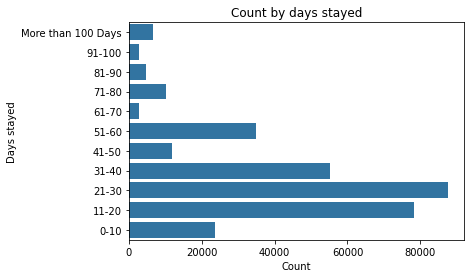

In [21]:
#to count number of days stayed in the hospital
base_color=sns.color_palette()[0]
sns.countplot(data=df, y='Stay', color=base_color)
chart('Count','Days stayed','Count by days stayed')

The count of days stayed shows that the days people stayed the most was 21-30 days while the lowest number was 61-70 and 91-100 days

### Most popular Admission made by patients
There are different ways patients get admitted into the hospital this gives nore insight on the admission made

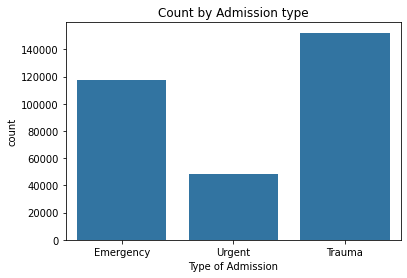

In [22]:
# to count number of Admission type
base_color=sns.color_palette()[0]
sns.countplot(data=df, x='Type_of_Admission', color=base_color)
chart('Type of Admission','count','Count by Admission type')

The highest type of admission is Trauma and the lowest urgent

### The severity of illness
This will give more insight on the basis of a patient length of stay and how severe the illness is

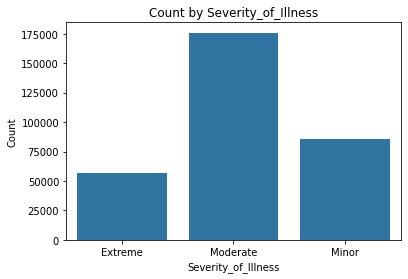

In [23]:
#to count number of the different type of severity of illness
base_color=sns.color_palette()[0]
sns.countplot(data=df, x='Severity_of_Illness', color=base_color)
chart('Severity_of_Illness','Count','Count by Severity_of_Illness')

The highest severity of illness is Moderate while Extreme is the least

#### Age range of patients
What is the most popular age range patients who come to the hospital have

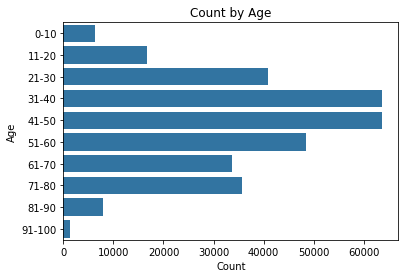

In [24]:
#to count the number of age range
base_color=sns.color_palette()[0]
sns.countplot(data=df, y='Age', color=base_color)
chart('Count','Age','Count by Age')

Patients between age ranges 31-40 and 41-50 are the most in the hospital while 91-100 are the least

### Admission deposit
This shows how the deposit made by patient before admitted into the hoapital is distributed

Text(0.5, 0, 'Admission deposit')

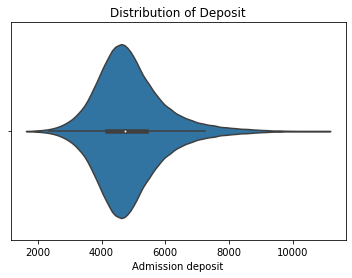

In [25]:
base_color=sns.color_palette()[0]
sns.violinplot(data = df, x = 'Admission_Deposit')
plt.title('Distribution of Deposit')
plt.xlabel('Admission deposit')

The distribution is skewed to the right and is between 4000 and 6000 

#### Departments in the Hospital
This tells the types of departments in the hospital and the most visited by patients

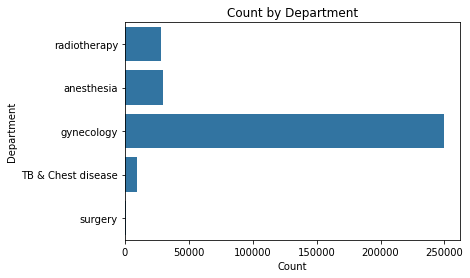

In [26]:
#to count the number of departments in the hospital
base_color=sns.color_palette()[0]
sns.countplot(data=df, y='Department', color=base_color)
chart('Count','Department','Count by Department')

The gynecology department is the department where patients go to the most while Surgery is the least

### Extra rooms available
This is the count of top 5 Extra rooms in the hospital

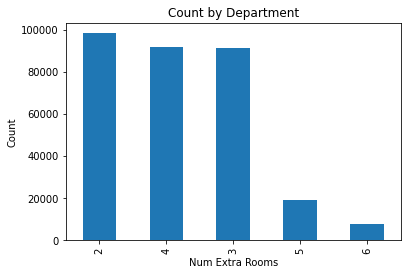

In [27]:
#to count the number of departments in the hospital
plot = df.Extra_Rooms.value_counts().nlargest().plot(kind='bar')
base_color=sns.color_palette()[0]
chart('Num Extra Rooms','Count','Count by Department')

The 2,3,4 rooms have the highest number of extra rooms in the hospital

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The Stay column is ordinal and within an interval so it had to be transformwd into a categorical format to give it more context. The LOS of 21-30 days is the most common days people spend in the Hospital 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Most of the other features were also in an ordinal format and had to be placed in category from the hoghest to the lowest format to make it more understandable whic includes Type of admission, Severity of illness and other ordinal data. The most number of age range is the 31-40 and 41-50 age range.                                                                           

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [28]:
df.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Extra_Rooms,Department,Ward_Type,Ward_Facility_Code,patientid,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,31397,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,31397,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,31397,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,31397,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,31397,Trauma,Extreme,2,51-60,5558.0,41-50


### Does severity of illness has to do with length of stay?

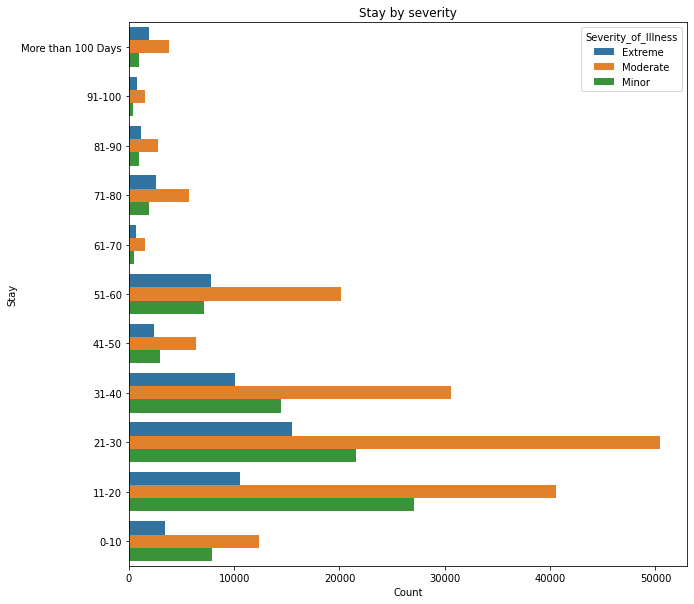

In [29]:
plt.figure(figsize = [10,10])
sns.countplot(data = df, y = 'Stay', hue = 'Severity_of_Illness')
chart('Count', 'Stay', 'Stay by severity')

The patients who stayed longer than 100 days had moderate illness followed by an extreme illness. Since it can be seen that almost all other LOS from 41-50 days and below has moderate illness followed by minor but from longer LOS 51-60 and above the chart shows they have more extreme cases than minor cases. Then severity of illness has an impact on the duration of LOS.

### Does type of Admission affect the LOS

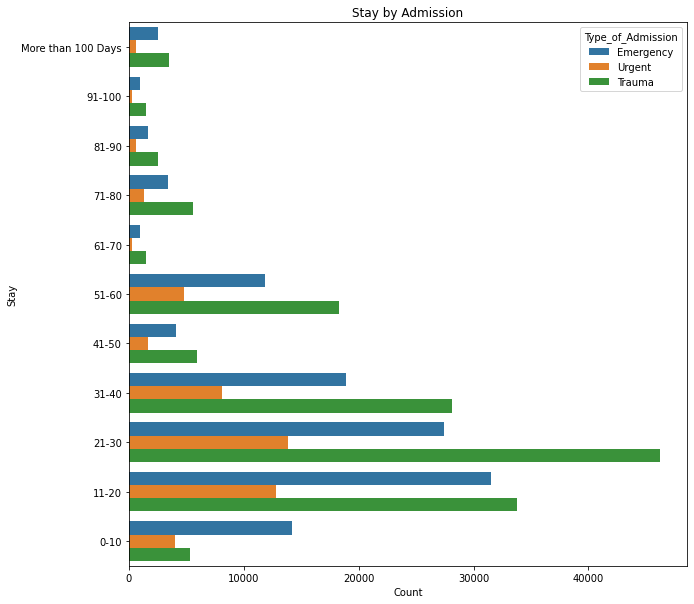

In [30]:
plt.figure(figsize = [10,10])
sns.countplot(data = df, y = 'Stay', hue = 'Type_of_Admission')
chart('Count', 'Stay', 'Stay by Admission')

Admission for Trauma is the most common for the LOS and holds the highest number for LOS of more than 100 days

### Age with most severity of illness

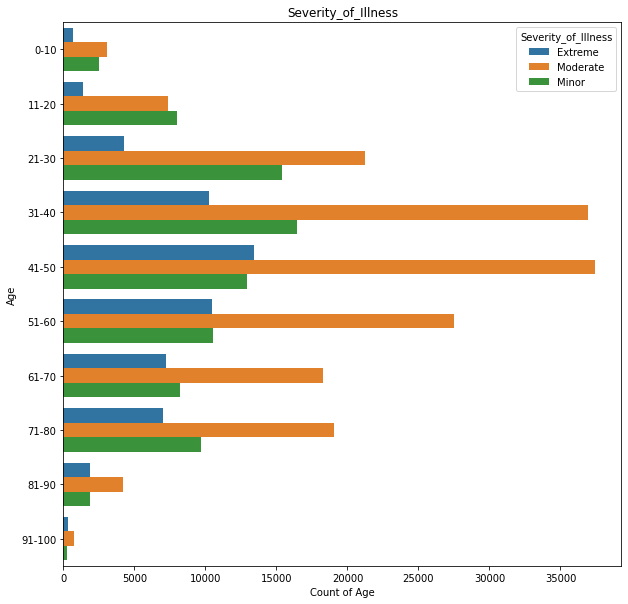

In [31]:
plt.figure(figsize = [10,10])
sns.countplot(data = df, y = 'Age', hue = 'Severity_of_Illness')
chart('Count of Age', 'Age', 'Severity_of_Illness')

The commonn severity of illness across all age range is Moderate and at some particular age the minor surpasses the Extereme and vice versa. Age 0-10 has more minor cases than extreme while 91-100 has more extreme cases than minor though they are a small amount of Patient.

### Top 10 patients against thier age

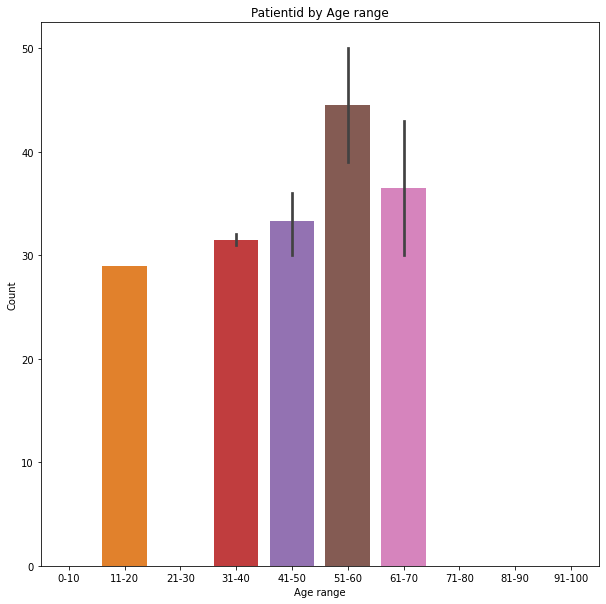

In [32]:
plt.figure(figsize = [10,10])
ploty = df.patientid.value_counts().nlargest(10)
base_color=sns.color_palette()[0]
sns.barplot(data =df, y = ploty, x = 'Age')
chart('Age range','Count','Patientid by Age range')

The 10 patients who visited the hospital most were from the age range of 11-20, 31-40, 41-50, 51-60, 61-70

### Age range by the department in the hospital

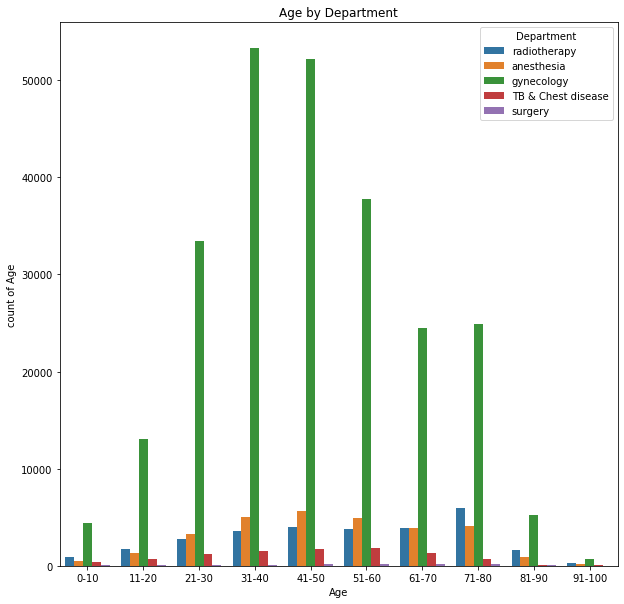

In [33]:
plt.figure(figsize = [10,10])
sns.countplot(data = df, x = 'Age', hue = 'Department')
chart('Age', 'count of Age','Age by Department')

The Gynecology department is the most visited and includes mostly patient from the age range 31-40 and 41-50 the least visited is surgery department.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In relation to the length of Stay from the visualization of stay with the severity of illness it has seen that the more severe the illness the longer the length of stay.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The age and department had an interesting correlation. Since women are mostly the visitors of Gyneacologist then it implies that the patients are women between the age of 31-40 and 41-50.

## Multivariate Exploration

Plots of multiple variables

### Correlation between all the numerical variables in the dataset

<AxesSubplot:>

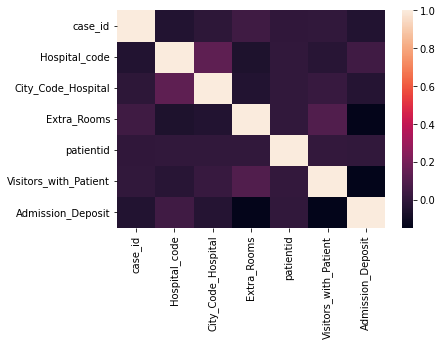

In [34]:
sns.heatmap(df.corr())

The strongest correlation betweent the variables is 0.3 and the lowest is 0.0 the is betweenn Visitors with patients and Extra rooms

### Relationship between age of patients, visitors and extra rooms

<AxesSubplot:xlabel='Visitors_with_Patient', ylabel='Extra_Rooms'>

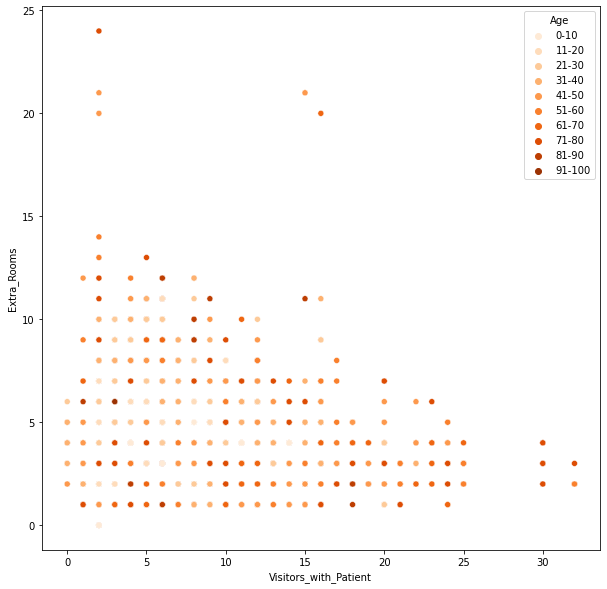

In [35]:
plt.figure(figsize = [10,10])
sns.scatterplot(data = df, y = 'Extra_Rooms', x = 'Visitors_with_Patient', hue = 'Age', palette = 'Oranges')

The younger age group 0-10, 11-20 had fewer number of visitors but had high number of extra rooms while the older patients up to 91-100 had higher number of visitors and lowe extra rooms

### Relationship between Stay of patients, visitors and extra rooms

<AxesSubplot:xlabel='Visitors_with_Patient', ylabel='Extra_Rooms'>

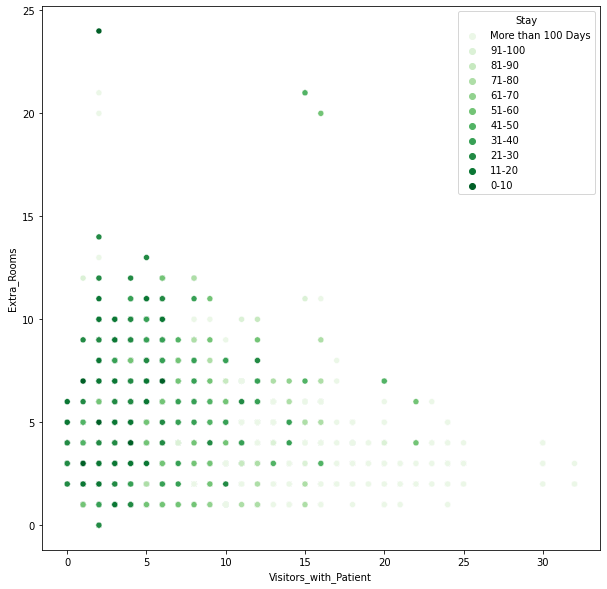

In [36]:
plt.figure(figsize = [10,10])
sns.scatterplot(data = df, y = 'Extra_Rooms', x = 'Visitors_with_Patient', hue = 'Stay', palette = 'Greens')

Patients with longer stay had lot of visitors but little extra rooms while those who had fewer LOS had not so much visitor with plenty extra rooms

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Adding the age and stay feature to the extar room and visitor plot gave more insight to the original chart. It was seen that the younger age group 0-10, 11-20 had fewer number of visitors but had high number of extra rooms while the older patients up to 91-100 had higher number of visitors and lowe extra rooms.
Also, Patients with longer stay from 91-100 days and more had lot of visitors but little extra rooms while those who had fewer LOS had not so much visitor with plenty extra rooms.

### Were there any interesting or surprising interactions between features?

It can be seen that the Longer the length of stay of a patient the less extra room that will be available.

## Conclusions
After the data was downloaded from Kaggle it was loaded into this notebook it had 318438 rows and, 18 columns. It was then wrangled the first wrangling step was to check for the data tidiness luckily it had good structure so the was nothing to be done. Next the data was checked for dirtiness this also was almost none as it was just a small percentage of the data set (from two columns) that was missing these rows were dropped. 

The data was then visualized in three forms Univariate, Bivariate and Multi variate forms.

They all gave further insight to the data
Countplot, Barchart, Violin plot, Scatter plot, heatmap were all used to visualize.